Рассмотрим случайную величину $ X $ с функцией распределения $ F\left(x\right) $. Пусть имеется ее выборка объема $ n $:

$$ X\backsim F\left(x\right),\ \ X^n=\left(X_1,\ X_2,\ ...,\ X_n\right) $$

По выборке можно вычислить выборочное среднее:

$$ {\bar{X}}_n=\frac{1}{n}\sum_{i=1}^{n}X_i $$


[Известно](https://ru.qwe.wiki/wiki/Central_limit_theorem), что распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением __центральной предельной теоремы__:

$$ X\backsim F\left(x\right),\ \ X^n=\left(X_1,\ X_2,\ ...,\ X_n\right)\ \ \ \Longrightarrow\ \ \ {\bar{X}}_n\approx\backsim N\left(EX,\ \frac{DX}{n}\right) $$

где:

- $ X $ - непрерывная случайная величина;
- $ F\left(x\right) $ - распределение случайной величины;
- $ n $ - объем выборки из распределения случайной величины;
- $ EX $ - математическое ожидание;
- $ DX $ - дисперсия;

С ростом $ n $ точность нормальной аппроксимации увеличивается.

В данном блокноте выполнено наглядное отображение работы предельной центральной теоремы на примере __экспоненциального (показательного) распределения__.

[Экспоненциальное распределение](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) ($ X\backsim Exp\left(\lambda\right) $) описывает интервалы времени между независимыми событиями, происходящими со средней интенсивностью $ \lambda $. Количество наступлений такого события за некоторый отрезок времени описывается дискретным [распределением Пуассона](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D1%83%D0%B0%D1%81%D1%81%D0%BE%D0%BD%D0%B0).

__Плотность вероятности:__ $ f\left(x\right)=\lambda e^{-\lambda x} $ при $ x\geq0 $.

__Функция распределения:__ $ F\left(x\right)=1-e^{-\lambda x} $ при $ x\geq0 $.

__Математическое ожидание:__ $ EX=\frac{1}{\lambda} $.

__Дисперсия:__ $ DX=\frac{1}{\lambda^2} $.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Задание экспоненциально распределенной случайной величины с параметром  $ \lambda=\frac{1}{20} $ :

In [2]:
lambd = 0.05

Математическое ожидание $ EX $ и дисперсия $ DX $ исходной функции распределения:

In [3]:
EX = 1 / lambd
DX = 1 / lambd**2

print('EX = ', EX, '\nDX = ', round(DX, 3))

EX =  20.0 
DX =  400.0


Гистограмма выборки случайной величины и теоретической плотности ее распределения

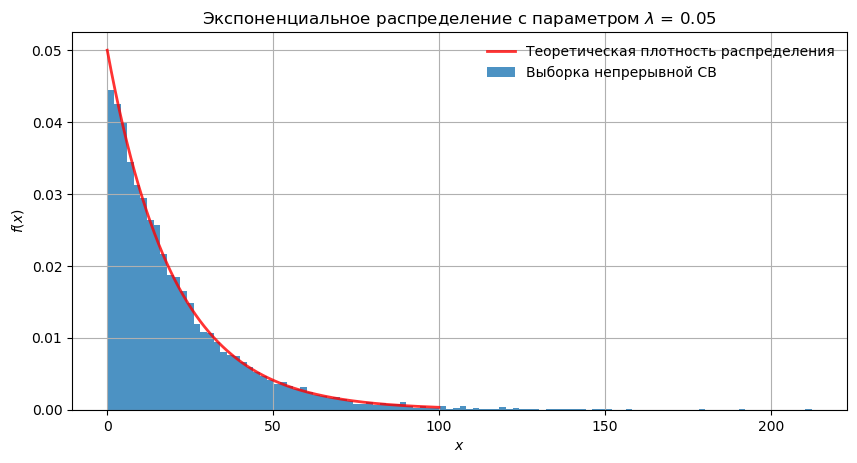

In [4]:
# Генерация выборки непрерывной случайной величины из экспоненциального распределения объема 1000 для построения гистограммы :
rvs = sts.expon(scale = 1 / lambd).rvs(10000)

#Генерация выборки для построения теоретической плотности распределения случайной величины на заднном участке:
x = np.linspace(0,100,10000)
pdf = sts.expon(scale = 1 / lambd).pdf(x)


fig, ax = plt.subplots(figsize=(10,5), dpi=100)

# Построение теоретической плотности распределения случайной величины
ax.plot(x, pdf, 'r-', lw=2, alpha=0.8, label='Теоретическая плотность распределения')

# Построение гистограммы выборки случайной величины
ax.hist(rvs, density=True, bins = 'auto', histtype='stepfilled', alpha=0.8, label='Выборка непрерывной СВ')

ax.legend(loc='upper right', frameon=False)

plt.title(f'Экспоненциальное распределение c параметром $\lambda$ = {lambd}') 
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.grid(True)

plt.show()

Построение гистограмм распределения выборочных средних массивов различных объемов $n$

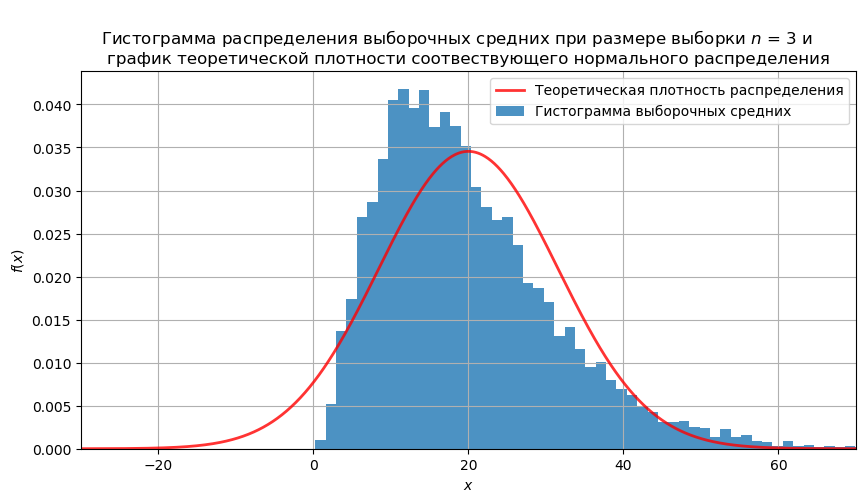

Параметры распределения:

Математическое ожидание EX =  20.036 
Дисперсия DX =  131.64 
Среднеквадратическое отклонение σ =  11.473






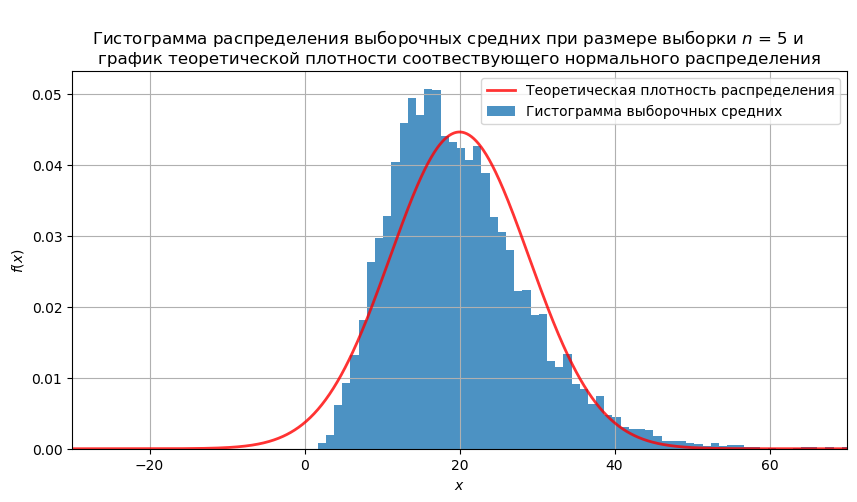

Параметры распределения:

Математическое ожидание EX =  20.015 
Дисперсия DX =  78.18 
Среднеквадратическое отклонение σ =  8.842






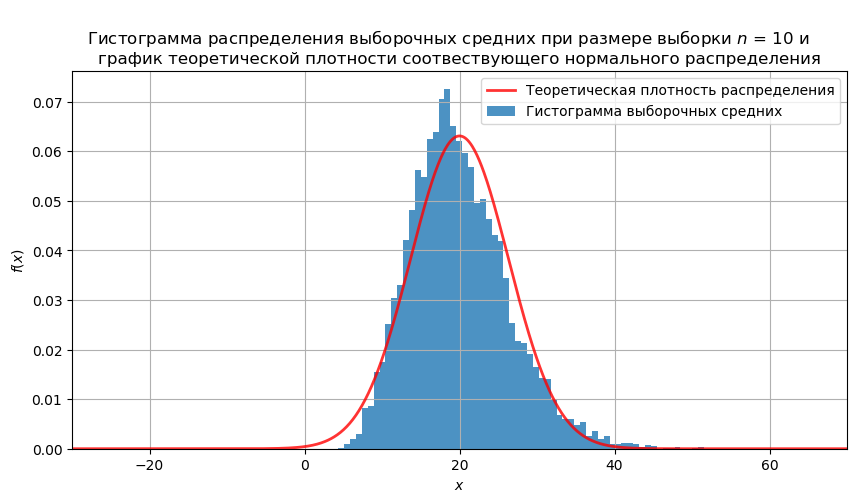

Параметры распределения:

Математическое ожидание EX =  19.981 
Дисперсия DX =  39.606 
Среднеквадратическое отклонение σ =  6.293






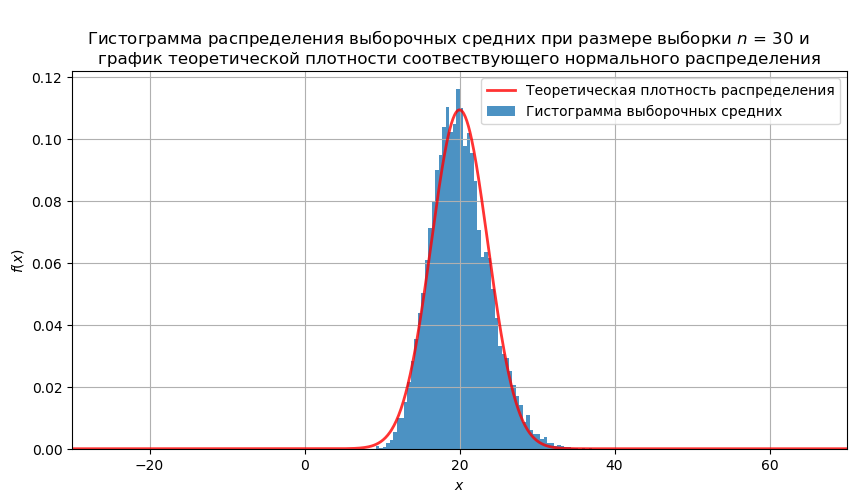

Параметры распределения:

Математическое ожидание EX =  20.07 
Дисперсия DX =  13.797 
Среднеквадратическое отклонение σ =  3.714






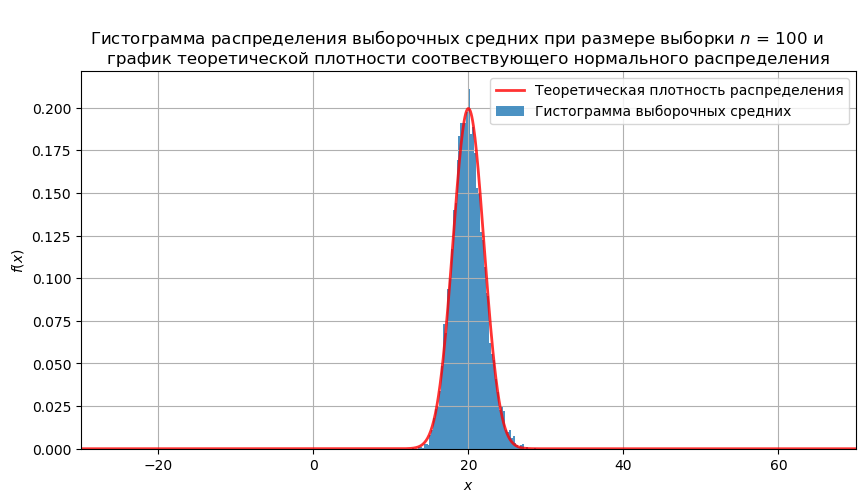

Параметры распределения:

Математическое ожидание EX =  19.997 
Дисперсия DX =  4.119 
Среднеквадратическое отклонение σ =  2.03






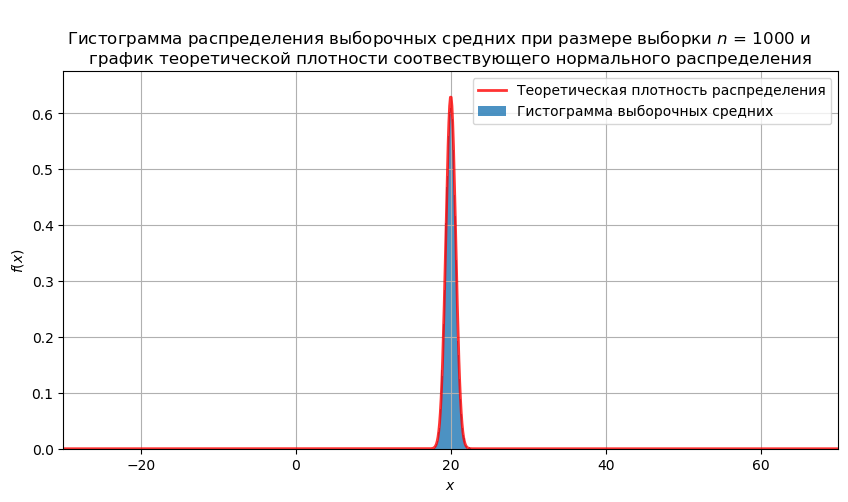

Параметры распределения:

Математическое ожидание EX =  19.994 
Дисперсия DX =  0.404 
Среднеквадратическое отклонение σ =  0.635






In [5]:
m = 10000 # Количество выборок
n = [3, 5, 10, 30, 100, 1000] # Размер выборок

for j in range(len(n)):
    
    rvs = np.zeros(m)
    
    for i in range(m):
        rvs[i] = sts.expon(scale = 1 / lambd).rvs(n[j]).mean()
    
    fig, nx = plt.subplots(figsize=(10,5), dpi=100)

    # Построение теоретической плотности нормального распределения
    x = np.linspace(1/lambd-50,1/lambd+50,1000)
    pdf = sts.norm(loc=EX, scale=(DX/n[j])**0.5).pdf(x)
    nx.plot(x, pdf, 'r-', lw=2, alpha=0.8, label='Теоретическая плотность распределения')

    # Построение гистограммы полученного распределения выборочных средних
    nx.hist(rvs, density=True, bins = 'auto', histtype='stepfilled', alpha=0.8, label='Гистограмма выборочных средних')

    nx.legend(loc='upper right', frameon=True)

    plt.title(f'\nГистограмма распределения выборочных средних при размере выборки $n$ = {n[j]} и \
    \nграфик теоретической плотности соотвествующего нормального распределения') 
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

    nx.set_xlim([1/lambd-50,1/lambd+50])
    plt.grid(True)

    plt.show()
    
    print('Параметры распределения:')
    
    print('\nМатематическое ожидание EX = ', round(np.mean(rvs), 3), 
          '\nДисперсия DX = ', round(np.var(rvs), 3), 
          '\nСреднеквадратическое отклонение σ = ', round(np.std(rvs), 3))
    
    print('\n\n\n')

### Выводы

Оцениваемое распределение $ X\backsim Exp\left(\lambda\right) $ сильно скошено слева, что видно на графике плонтности распределения, поэтому при оценке массива его выборочных средних на небольщих объемах выборок $ n $ (3, 5, 10) центральная предельная теорема работает не очень хорошо (скошена левая часть). С увеличением объема выборок данная проблема уходит. Точность апроксимации при увеличении объема выборок возрастает, о чем свидетельствует приближении оценочного математического ожидания к теоретическому и уменьшение среднеквадратического отклонения.